# LSTM Model for stock price prediction (AAPL)

Epoch 1/150
9/9 [==============================] - 13s 736ms/step - loss: 0.2471
Epoch 2/150
9/9 [==============================] - 7s 774ms/step - loss: 0.0518
Epoch 3/150
9/9 [==============================] - 8s 861ms/step - loss: 0.0381
Epoch 4/150
9/9 [==============================] - 8s 873ms/step - loss: 0.0332
Epoch 5/150
9/9 [==============================] - 9s 964ms/step - loss: 0.0276
Epoch 6/150
9/9 [==============================] - 7s 793ms/step - loss: 0.0215
Epoch 7/150
9/9 [==============================] - 7s 815ms/step - loss: 0.0184
Epoch 8/150
9/9 [==============================] - 8s 954ms/step - loss: 0.0168
Epoch 9/150
9/9 [==============================] - 8s 863ms/step - loss: 0.0178
Epoch 10/150
9/9 [==============================] - 7s 824ms/step - loss: 0.0185
Epoch 11/150
9/9 [==============================] - 8s 882ms/step - loss: 0.0175
Epoch 12/150
9/9 [==============================] - 8s 924ms/step - loss: 0.0152
Epoch 13/150
9/9 [==================

C:\Users\Shemeen62\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step


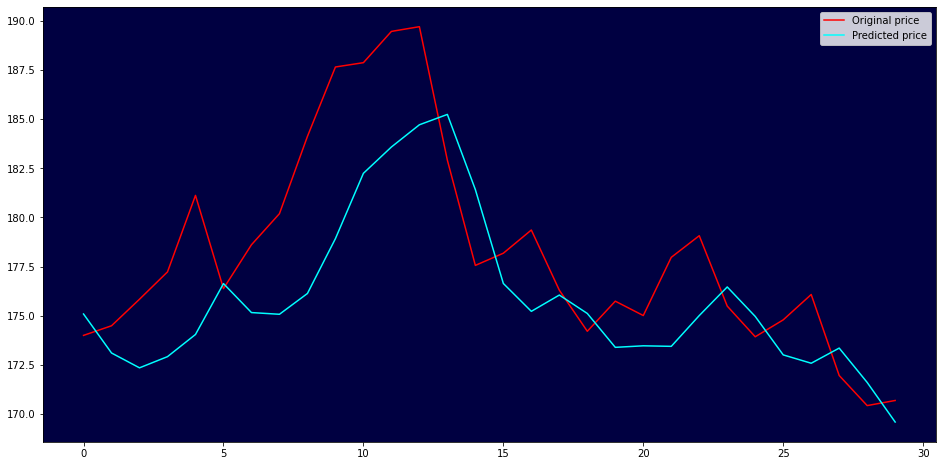

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

# Define the window size and batch size
time_step = 100
batch_size = 64

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# model = Sequential()
# model.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=250,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=250,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=250))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')


# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=150, batch_size=32)
model.save(tk+'_stock_prediction.h5')

model = load_model(tk+'_stock_prediction.h5')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 15.35344508321335
Mean Absolute Error (MAE): 3.1939849853515625


# MSFT 

14/14 [==============================] - 14s 887ms/step


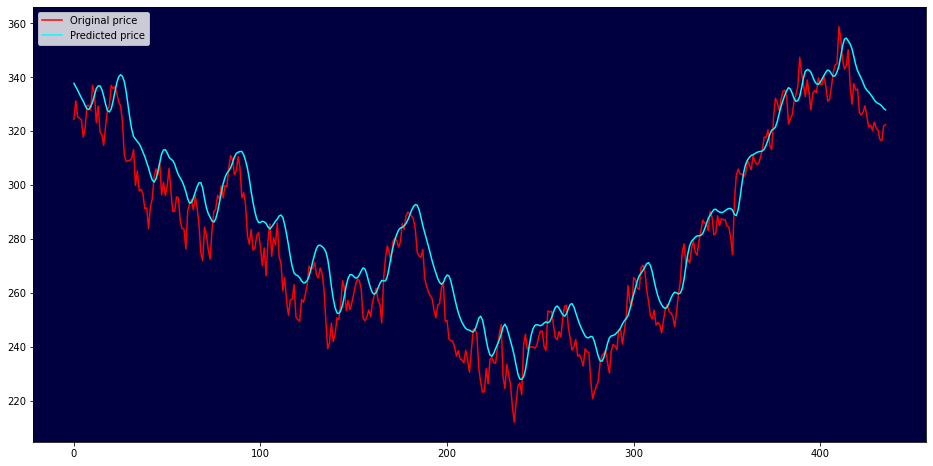

In [41]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df, time_step=1):
    x = []
    y = []
    for i in range(time_step, df.shape[0]):
        x.append(df[i-time_step:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_step = 100
x_train, y_train = create_dataset(dataset_train, time_step)
x_test, y_test = create_dataset(dataset_test, time_step)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # # Create the Stacked LSTM model
# model = Sequential()
# model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.4))
# model.add(LSTM(units=500, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=350, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=200))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

# # x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# # x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# model.compile(loss='mean_squared_error', optimizer='adam')

# model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1)

# # Save the trained model to a file using joblib
# joblib.dump(scaler, tk + '_scaler.joblib')
# model.save(tk + '_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_scaler.joblib')
model = load_model(tk + '_stock_prediction_new.keras')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()



In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = math.sqrt(mean_squared_error(y_test_scaled, predictions))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) : ", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 121.87098841266354
Root Mean Squared Error (RMSE) :  11.039519392286222
Mean Absolute Error (MAE): 8.791381660951387


Enter the number of days to predict: 30
Predicted Prices:
                        Date  Predicted Price
0  2023-08-24 00:00:00-04:00       329.231659
1  2023-08-25 00:00:00-04:00       331.157837
2  2023-08-26 00:00:00-04:00       333.446136
3  2023-08-27 00:00:00-04:00       335.798431
4  2023-08-28 00:00:00-04:00       338.058777
5  2023-08-29 00:00:00-04:00       340.170715
6  2023-08-30 00:00:00-04:00       342.124908
7  2023-08-31 00:00:00-04:00       343.927734
8  2023-09-01 00:00:00-04:00       345.587067
9  2023-09-02 00:00:00-04:00       347.109985
10 2023-09-03 00:00:00-04:00       348.504364
11 2023-09-04 00:00:00-04:00       349.778931
12 2023-09-05 00:00:00-04:00       350.943878
13 2023-09-06 00:00:00-04:00       352.010498
14 2023-09-07 00:00:00-04:00       352.991058
15 2023-09-08 00:00:00-04:00       353.897583
16 2023-09-09 00:00:00-04:00       354.741577
17 2023-09-10 00:00:00-04:00       355.534515
18 2023-09-11 00:00:00-04:00       356.286743
19 2023-09-12 00:00:00

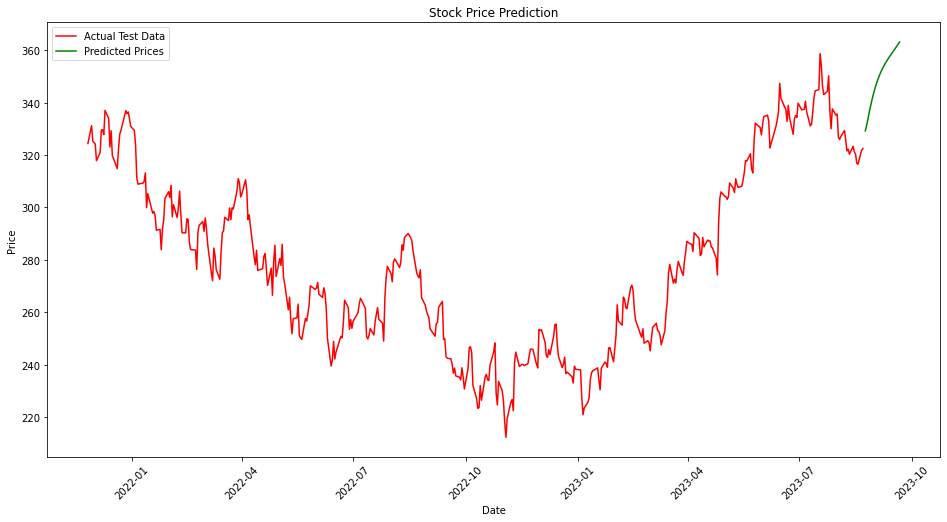

In [43]:
# #Future prediction ##########################################################

# # Predictions for future days
future_days = int(input("Enter the number of days to predict: "))
x_input = dataset_test[len(dataset_test) - time_step:].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

n_steps = time_step
lst_output = []

for i in range(future_days):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.append(yhat[0, 0])  # Append the predicted value directly
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.append(yhat)  # Append the predicted value directly

        
lst_output = lst_output[1:]
# Inverse transform predictions back to the original scale
predicted_prices = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()

# Get the corresponding dates for the predicted prices
future_dates = pd.date_range(start=df_original.index[-1], periods=future_days + 1, inclusive='right')[1:]

# # Check if the lengths of future_dates and predicted_prices match
if len(future_dates) != len(predicted_prices):
    print("Length mismatch between future_dates and predicted_prices.")
else:
    # Create a dataframe to display the predicted prices and dates
    predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': predicted_prices})

print("Predicted Prices:")
print(predictions_df)

# Plot the original data, test data, and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(df_original.index[-len(y_test_scaled):], y_test_scaled, color='red', label='Actual Test Data')
plt.plot(future_dates, predicted_prices, color='green', label="Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# AAPL (With 150 Epchs)

Epoch 1/150
33/33 [==============================] - 133s 4s/step - loss: 0.0128
Epoch 2/150
33/33 [==============================] - 129s 4s/step - loss: 0.0012
Epoch 3/150
33/33 [==============================] - 125s 4s/step - loss: 0.0012
Epoch 4/150
33/33 [==============================] - 130s 4s/step - loss: 0.0018
Epoch 5/150
33/33 [==============================] - 132s 4s/step - loss: 0.0015
Epoch 6/150
33/33 [==============================] - 134s 4s/step - loss: 0.0017
Epoch 7/150
33/33 [==============================] - 126s 4s/step - loss: 9.5706e-04
Epoch 8/150
33/33 [==============================] - 129s 4s/step - loss: 0.0012
Epoch 9/150
33/33 [==============================] - 135s 4s/step - loss: 9.6787e-04
Epoch 10/150
33/33 [==============================] - 131s 4s/step - loss: 8.6812e-04
Epoch 11/150
33/33 [==============================] - 127s 4s/step - loss: 0.0034
Epoch 12/150
33/33 [==============================] - 132s 4s/step - loss: 0.0014
Epoch 13/150


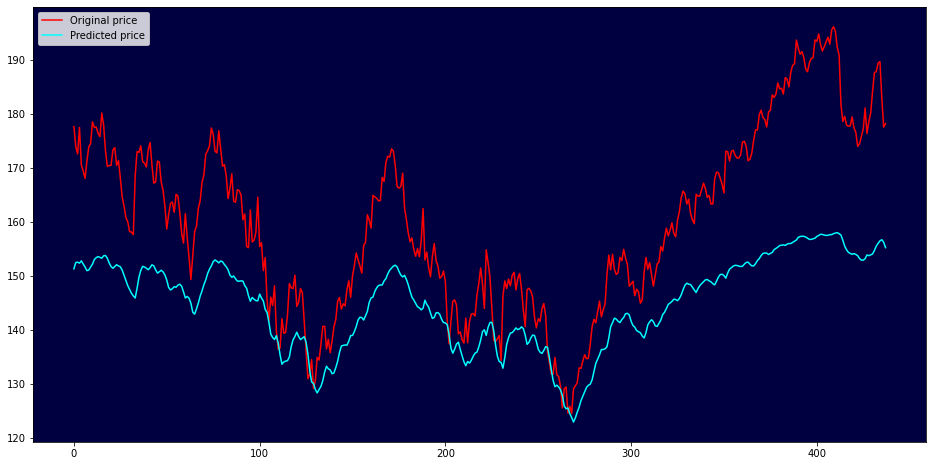

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df, time_step=1):
    x = []
    y = []
    for i in range(time_step, df.shape[0]):
        x.append(df[i-time_step:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_step = 100
x_train, y_train = create_dataset(dataset_train, time_step)
x_test, y_test = create_dataset(dataset_test, time_step)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # # Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=400, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=150))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=150, batch_size=64, verbose=1)

# Save the trained model to a file using joblib
joblib.dump(scaler, tk + '_scaler.joblib')
model.save(tk + '_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_scaler.joblib')
model = load_model(tk + '_stock_prediction_new.keras')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = math.sqrt(mean_squared_error(y_test_scaled, predictions))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) : ", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 303.8811437742679
Root Mean Squared Error (RMSE) :  17.432187004913295
Mean Absolute Error (MAE): 14.98143310198502


# ORCL (With 150 Epchs)

Epoch 1/150
33/33 [==============================] - 132s 4s/step - loss: 0.0641
Epoch 2/150
33/33 [==============================] - 129s 4s/step - loss: 0.0016
Epoch 3/150
33/33 [==============================] - 129s 4s/step - loss: 0.0015
Epoch 4/150
33/33 [==============================] - 128s 4s/step - loss: 0.0013
Epoch 5/150
33/33 [==============================] - 144s 4s/step - loss: 0.0016
Epoch 6/150
33/33 [==============================] - 251s 8s/step - loss: 0.0014
Epoch 7/150
33/33 [==============================] - 257s 8s/step - loss: 0.0013
Epoch 8/150
33/33 [==============================] - 221s 7s/step - loss: 0.0013
Epoch 9/150
33/33 [==============================] - 128s 4s/step - loss: 0.0022
Epoch 10/150
33/33 [==============================] - 126s 4s/step - loss: 0.0013
Epoch 11/150
33/33 [==============================] - 128s 4s/step - loss: 0.0011
Epoch 12/150
33/33 [==============================] - 144s 4s/step - loss: 0.0011
Epoch 13/150
33/33 [=====

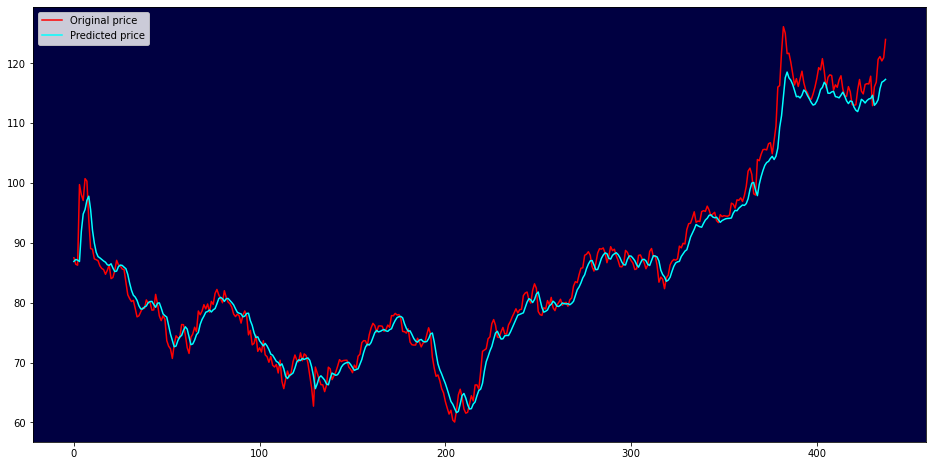

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'ORCL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df, time_step=1):
    x = []
    y = []
    for i in range(time_step, df.shape[0]):
        x.append(df[i-time_step:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_step = 100
x_train, y_train = create_dataset(dataset_train, time_step)
x_test, y_test = create_dataset(dataset_test, time_step)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # # Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=400, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=150))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=150, batch_size=64, verbose=1)

# Save the trained model to a file using joblib
joblib.dump(scaler, tk + '_scaler.joblib')
model.save(tk + '_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_scaler.joblib')
model = load_model(tk + '_stock_prediction_new.keras')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = math.sqrt(mean_squared_error(y_test_scaled, predictions))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) : ", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 5.682187582285699
Root Mean Squared Error (RMSE) :  2.383733957950362
Mean Absolute Error (MAE): 1.7645889874462668


# Making the model independent of the training data

# Model without technical indicators

In [47]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import joblib

# Define the stock symbol and load historical data
tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-01-01')
df_original = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64


def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


# Create the Stacked LSTM model
# model = Sequential()
# model.add(LSTM(units=400, return_sequences=True, input_shape=(time_step, 1)))
# model.add(Dropout(0.4))
# model.add(LSTM(units=400, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(units=500, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(units=150))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))
# model.compile(loss='mean_squared_error', optimizer='adam')
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Data preparation
df_close = df['Close'].values.reshape(-1, 1)
df_scaled = scaler.fit_transform(df_close)
x_train, y_train = create_dataset(df_scaled, time_step)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Train the model
model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1)

# Save the trained model and scaler
joblib.dump(scaler, tk + '_scaler.joblib')
model.save(tk + '_stock_prediction.keras')


Epoch 1/150
6/6 [==============================] - 28s 4s/step - loss: 0.4720
Epoch 2/150
6/6 [==============================] - 25s 4s/step - loss: 0.1427
Epoch 3/150
6/6 [==============================] - 24s 4s/step - loss: 0.0421
Epoch 4/150
6/6 [==============================] - 21s 3s/step - loss: 0.0298
Epoch 5/150
6/6 [==============================] - 21s 4s/step - loss: 0.0280
Epoch 6/150
6/6 [==============================] - 21s 3s/step - loss: 0.0219
Epoch 7/150
6/6 [==============================] - 21s 3s/step - loss: 0.0193
Epoch 8/150
6/6 [==============================] - 21s 3s/step - loss: 0.0150
Epoch 9/150
6/6 [==============================] - 24s 4s/step - loss: 0.0149
Epoch 10/150
6/6 [==============================] - 20s 3s/step - loss: 0.0138
Epoch 11/150
6/6 [==============================] - 21s 3s/step - loss: 0.0149
Epoch 12/150
6/6 [==============================] - 21s 3s/step - loss: 0.0129
Epoch 13/150
6/6 [==============================] - 21s 3s/st

1/1 [==============================] - 0s 81ms/step
Date: 2023-09-30, Predicted Price: 169.23
Date: 2023-10-01, Predicted Price: 169.32
Date: 2023-10-02, Predicted Price: 171.07
Date: 2023-10-03, Predicted Price: 174.48
Date: 2023-10-04, Predicted Price: 178.65
Date: 2023-10-05, Predicted Price: 181.90
Date: 2023-10-06, Predicted Price: 184.10
Date: 2023-10-07, Predicted Price: 185.07
Date: 2023-10-08, Predicted Price: 187.00
Date: 2023-10-09, Predicted Price: 192.87
Date: 2023-10-10, Predicted Price: 200.63
Date: 2023-10-11, Predicted Price: 209.02
Date: 2023-10-12, Predicted Price: 216.05
Date: 2023-10-13, Predicted Price: 220.77
Date: 2023-10-14, Predicted Price: 226.31


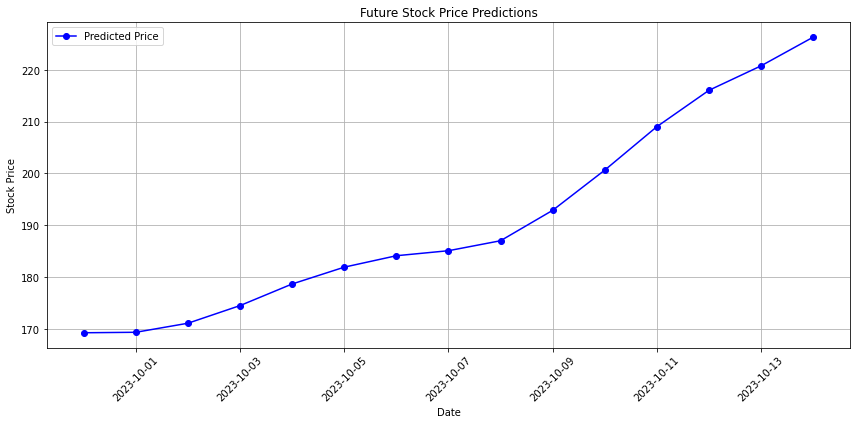

In [90]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import joblib

# Define the stock symbol and load historical data
tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-01-01')
df_original = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

# Load the pre-trained model and scaler
try:
    scaler = joblib.load(tk + '_scaler.joblib')
    model = load_model(tk + '_stock_prediction.keras')
except FileNotFoundError:
    print("Pre-trained model and scaler not found. Please train the model first.")
    exit(1)

# Set a fixed seed for random number generation
np.random.seed(0)
    
def make_future_predictions(model, scaler, df, time_step, num_days):
    # Create a copy of the original dataframe
    df_copy = df.copy()
    
    # Initialize an empty array to store future predictions
    future_predictions = []
    future_dates = []  # To store corresponding dates
    
    # Loop to make predictions for the specified number of days
    for _ in range(num_days):
        # Prepare the data for the current window
        df_window = df_copy.iloc[-time_step:]['Close'].values.reshape(-1, 1)
        df_window_scaled = scaler.transform(df_window)
        x_window = df_window_scaled[-time_step:].reshape(1, -1, 1)
        
        # Make a prediction for the next day
        prediction = model.predict(x_window)
        prediction = scaler.inverse_transform(prediction)
        
        # Append the prediction to the future_predictions array
        future_predictions.append(prediction[0][0])
        
        # Get the date of the next day
        next_day_date = df_copy.index[-1] + pd.DateOffset(1)
        future_dates.append(next_day_date)
        
        # Update the dataframe with the new data point (you can replace this with real future data)
        # For this example, we are generating random data for demonstration purposes.
        new_data_point = np.random.uniform(0.9, 1.1) * df_copy.iloc[-1]['Close']
        new_data = pd.DataFrame({'Close': [new_data_point]}, index=[next_day_date])
        df_copy = pd.concat([df_copy, new_data])
    
    return future_dates, future_predictions

# Specify the number of days into the future for which you want to make predictions
num_days_future = 15  # Change this to the desired number of days

# Make future predictions
future_dates, future_predictions = make_future_predictions(model, scaler, df, time_step, num_days_future)

# Print the future predictions with dates
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Predicted Price: {prediction:.2f}")

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, marker='o', linestyle='-', color='b', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Future Stock Price Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Training model for multiple stock tickers

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import joblib

# Define a list of stock symbols
ticker_symbols = ['AAPL', 'MSFT', 'ORCL']  # Add more tickers as needed

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

# Create and train models for each stock symbol
for tk in ticker_symbols:
    # Load historical data
    ticker = yf.Ticker(tk)
    df = ticker.history(interval='1d', start='2022-01-01')
    df_original = df.copy()

    # Create the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=300, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(units=500, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100))
    model.add(Dropout(0.4))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Data preparation
    df_close = df['Close'].values.reshape(-1, 1)
    df_scaled = scaler.fit_transform(df_close)
    x_train, y_train = create_dataset(df_scaled, time_step)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Train the model
    model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1)

    # Save the trained model and scaler for each ticker
    joblib.dump(scaler, tk + '_scaler.joblib')
    model.save(tk + '_stock_prediction.keras')

    print(f"Model trained and saved for {tk}")

print("All models trained and saved.")

# Assessing models performance

# AAPL

Epoch 1/150
4/4 [==============================] - 16s 2s/step - loss: 0.1903 - val_loss: 0.3870
Epoch 2/150
4/4 [==============================] - 10s 3s/step - loss: 0.0960 - val_loss: 0.3152
Epoch 3/150
4/4 [==============================] - 11s 2s/step - loss: 0.0400 - val_loss: 0.0097
Epoch 4/150
4/4 [==============================] - 9s 2s/step - loss: 0.0336 - val_loss: 0.2291
Epoch 5/150
4/4 [==============================] - 9s 2s/step - loss: 0.0353 - val_loss: 0.1128
Epoch 6/150
4/4 [==============================] - 9s 2s/step - loss: 0.0189 - val_loss: 0.0197
Epoch 7/150
4/4 [==============================] - 9s 2s/step - loss: 0.0225 - val_loss: 0.0967
Epoch 8/150
4/4 [==============================] - 9s 2s/step - loss: 0.0192 - val_loss: 0.1319
Epoch 9/150
4/4 [==============================] - 9s 2s/step - loss: 0.0169 - val_loss: 0.0512
Epoch 10/150
4/4 [==============================] - 9s 2s/step - loss: 0.0176 - val_loss: 0.0395
Epoch 11/150
4/4 [==================

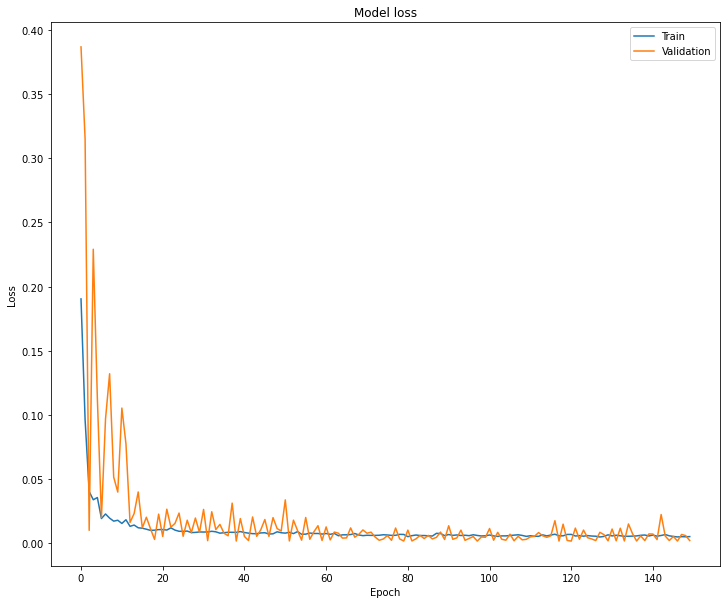

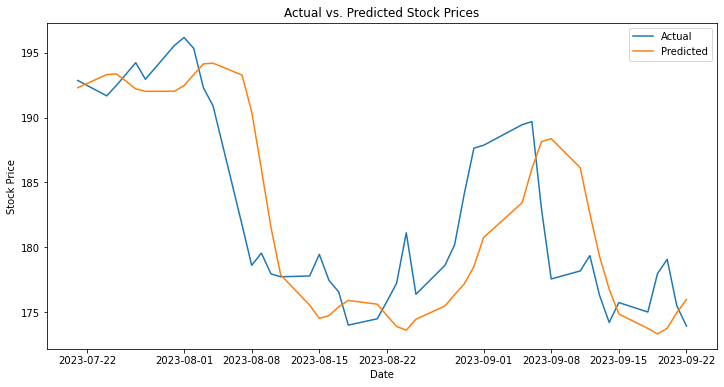

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import joblib

# Define the stock symbol and load historical data
tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')
df_original = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Data preparation
df_close = df['Close'].values.reshape(-1, 1)
df_scaled = scaler.fit_transform(df_close)
x_train, y_train = create_dataset(df_scaled, time_step)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Split the dataset into training, validation, and test sets
train_size = int(len(x_train) * 0.70)
val_size = int(len(x_train) * 0.15)
test_size = len(x_train) - train_size - val_size

x_train, x_val, x_test = x_train[0:train_size], x_train[train_size:train_size+val_size], x_train[-test_size:]
y_train, y_val, y_test = y_train[0:train_size], y_train[train_size:train_size+val_size], y_train[-test_size:]

# Train the model on the training set
history = model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1, validation_data=(x_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(x_test)
test_loss = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_loss}")

# Plot training & validation loss values
plt.figure(figsize=(12, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot actual vs. predicted stock prices for the test set
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(df_original.index[-len(y_test_inverse):], y_test_inverse, label='Actual')
plt.plot(df_original.index[-len(y_pred_inverse):], y_pred_inverse, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# MSFT

Epoch 1/150
4/4 [==============================] - 17s 3s/step - loss: 0.1946 - val_loss: 0.4047
Epoch 2/150
4/4 [==============================] - 9s 2s/step - loss: 0.0729 - val_loss: 0.2701
Epoch 3/150
4/4 [==============================] - 10s 2s/step - loss: 0.0273 - val_loss: 0.0122
Epoch 4/150
4/4 [==============================] - 9s 2s/step - loss: 0.0195 - val_loss: 0.2053
Epoch 5/150
4/4 [==============================] - 10s 2s/step - loss: 0.0246 - val_loss: 0.0911
Epoch 6/150
4/4 [==============================] - 11s 3s/step - loss: 0.0162 - val_loss: 0.0205
Epoch 7/150
4/4 [==============================] - 10s 2s/step - loss: 0.0154 - val_loss: 0.1174
Epoch 8/150
4/4 [==============================] - 14s 3s/step - loss: 0.0167 - val_loss: 0.0878
Epoch 9/150
4/4 [==============================] - 11s 3s/step - loss: 0.0132 - val_loss: 0.0213
Epoch 10/150
4/4 [==============================] - 11s 3s/step - loss: 0.0123 - val_loss: 0.0228
Epoch 11/150
4/4 [=============

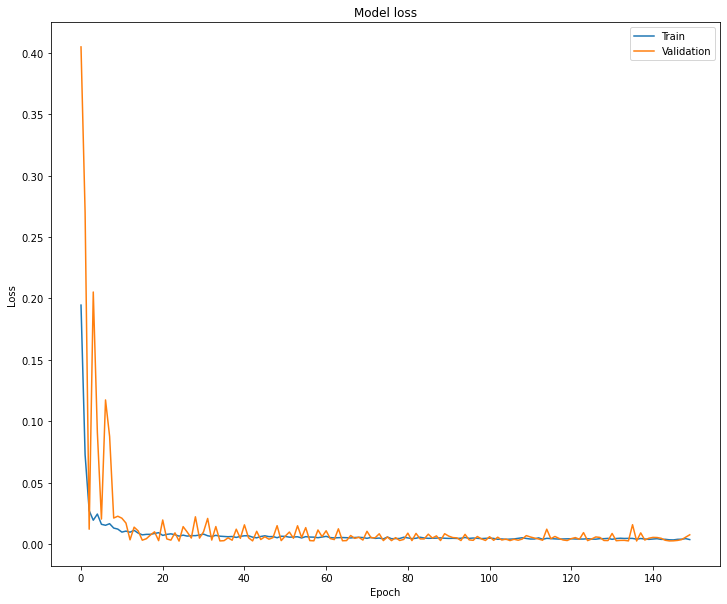

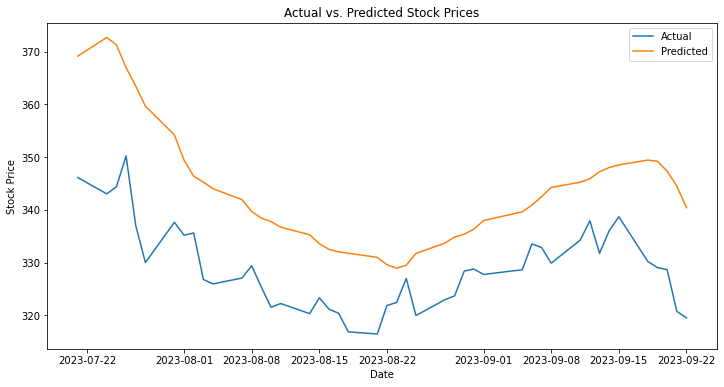

In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import joblib

# Define the stock symbol and load historical data
tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')
df_original = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Data preparation
df_close = df['Close'].values.reshape(-1, 1)
df_scaled = scaler.fit_transform(df_close)
x_train, y_train = create_dataset(df_scaled, time_step)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Split the dataset into training, validation, and test sets
train_size = int(len(x_train) * 0.70)
val_size = int(len(x_train) * 0.15)
test_size = len(x_train) - train_size - val_size

x_train, x_val, x_test = x_train[0:train_size], x_train[train_size:train_size+val_size], x_train[-test_size:]
y_train, y_val, y_test = y_train[0:train_size], y_train[train_size:train_size+val_size], y_train[-test_size:]

# Train the model on the training set
history = model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1, validation_data=(x_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(x_test)
test_loss = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_loss}")

# Plot training & validation loss values
plt.figure(figsize=(12, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot actual vs. predicted stock prices for the test set
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(df_original.index[-len(y_test_inverse):], y_test_inverse, label='Actual')
plt.plot(df_original.index[-len(y_pred_inverse):], y_pred_inverse, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# ORCL

Epoch 1/150
4/4 [==============================] - 18s 3s/step - loss: 0.0941 - val_loss: 0.4727
Epoch 2/150
4/4 [==============================] - 13s 3s/step - loss: 0.0753 - val_loss: 0.1773
Epoch 3/150
4/4 [==============================] - 15s 4s/step - loss: 0.0178 - val_loss: 0.0651
Epoch 4/150
4/4 [==============================] - 19s 5s/step - loss: 0.0114 - val_loss: 0.1459
Epoch 5/150
4/4 [==============================] - 15s 4s/step - loss: 0.0124 - val_loss: 0.0193
Epoch 6/150
4/4 [==============================] - 14s 3s/step - loss: 0.0107 - val_loss: 0.0735
Epoch 7/150
4/4 [==============================] - 14s 3s/step - loss: 0.0093 - val_loss: 0.0568
Epoch 8/150
4/4 [==============================] - 14s 3s/step - loss: 0.0072 - val_loss: 0.0119
Epoch 9/150
4/4 [==============================] - 13s 3s/step - loss: 0.0063 - val_loss: 0.0531
Epoch 10/150
4/4 [==============================] - 14s 3s/step - loss: 0.0071 - val_loss: 0.0152
Epoch 11/150
4/4 [===========

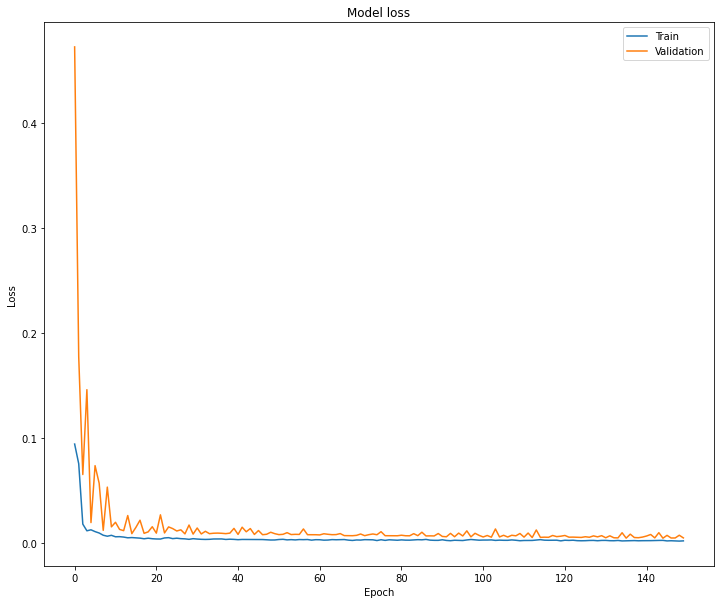

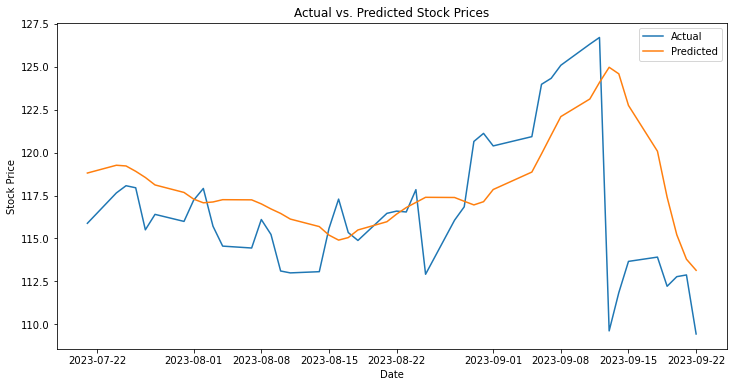

In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import joblib

# Define the stock symbol and load historical data
tk = 'ORCL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')
df_original = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Data preparation
df_close = df['Close'].values.reshape(-1, 1)
df_scaled = scaler.fit_transform(df_close)
x_train, y_train = create_dataset(df_scaled, time_step)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Split the dataset into training, validation, and test sets
train_size = int(len(x_train) * 0.70)
val_size = int(len(x_train) * 0.15)
test_size = len(x_train) - train_size - val_size

x_train, x_val, x_test = x_train[0:train_size], x_train[train_size:train_size+val_size], x_train[-test_size:]
y_train, y_val, y_test = y_train[0:train_size], y_train[train_size:train_size+val_size], y_train[-test_size:]

# Train the model on the training set
history = model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1, validation_data=(x_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(x_test)
test_loss = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_loss}")

# Plot training & validation loss values
plt.figure(figsize=(12, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot actual vs. predicted stock prices for the test set
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(df_original.index[-len(y_test_inverse):], y_test_inverse, label='Actual')
plt.plot(df_original.index[-len(y_pred_inverse):], y_pred_inverse, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Model with volumes

In [53]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import joblib

# Define the stock symbol and load historical data
tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')
df_original = df.copy()

# Initialize MinMaxScaler for closing prices
close_scaler = MinMaxScaler(feature_range=(0, 1))

# Initialize MinMaxScaler for trading volumes
volume_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the closing prices and volumes separately
df['Close'] = close_scaler.fit_transform(df['Close'].values.reshape(-1, 1))
df['Volume'] = volume_scaler.fit_transform(df['Volume'].values.reshape(-1, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        x.append(a)
        y.append(dataset[i + time_step, 0])  # Assuming the 'Close' price is in the first column
    x = np.array(x)
    y = np.array(y)
    return x, y

# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 2)))  # 2 features: Close and Volume
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(units=1))  # Output layer for predicting Close prices
model.compile(loss='mean_squared_error', optimizer='adam')

# Data preparation
df_features = df[['Close', 'Volume']].values
x_train, y_train = create_dataset(df_features, time_step)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))  # 2 features

# Train the model
model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1)

# Save the trained model and scalers
joblib.dump(close_scaler, tk + '_close_scaler.joblib')
joblib.dump(volume_scaler, tk + '_volume_scaler.joblib')
model.save(tk + '_stock_prediction_with_volume.keras')


Epoch 1/150
5/5 [==============================] - 24s 4s/step - loss: 0.4847
Epoch 2/150
5/5 [==============================] - 19s 4s/step - loss: 0.1748
Epoch 3/150
5/5 [==============================] - 18s 4s/step - loss: 0.0524
Epoch 4/150
5/5 [==============================] - 20s 4s/step - loss: 0.0358
Epoch 5/150
5/5 [==============================] - 19s 4s/step - loss: 0.0229
Epoch 6/150
5/5 [==============================] - 20s 4s/step - loss: 0.0171
Epoch 7/150
5/5 [==============================] - 19s 4s/step - loss: 0.0181
Epoch 8/150
5/5 [==============================] - 19s 4s/step - loss: 0.0156
Epoch 9/150
5/5 [==============================] - 19s 4s/step - loss: 0.0168
Epoch 10/150
5/5 [==============================] - 19s 4s/step - loss: 0.0138
Epoch 11/150
5/5 [==============================] - 19s 4s/step - loss: 0.0122
Epoch 12/150
5/5 [==============================] - 20s 4s/step - loss: 0.0116
Epoch 13/150
5/5 [==============================] - 20s 4s/st

C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))


1/1 [==============================] - 0s 74ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 74ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 60ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 71ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 70ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 71ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 76ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 61ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 74ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 77ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))


1/1 [==============================] - 0s 83ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 85ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_14968\968107891.py:42: SettingWithCopyWarning: 
A value

1/1 [==============================] - 0s 70ms/step
Date: 2023-09-30, Predicted Price: 305.12
Date: 2023-10-01, Predicted Price: 304.41
Date: 2023-10-02, Predicted Price: 305.03
Date: 2023-10-03, Predicted Price: 306.56
Date: 2023-10-04, Predicted Price: 308.19
Date: 2023-10-05, Predicted Price: 311.01
Date: 2023-10-06, Predicted Price: 316.55
Date: 2023-10-07, Predicted Price: 325.06
Date: 2023-10-08, Predicted Price: 333.47
Date: 2023-10-09, Predicted Price: 337.53
Date: 2023-10-10, Predicted Price: 336.87
Date: 2023-10-11, Predicted Price: 334.57
Date: 2023-10-12, Predicted Price: 332.80
Date: 2023-10-13, Predicted Price: 330.92
Date: 2023-10-14, Predicted Price: 327.06
Date: 2023-10-15, Predicted Price: 320.94
Date: 2023-10-16, Predicted Price: 312.68
Date: 2023-10-17, Predicted Price: 303.19
Date: 2023-10-18, Predicted Price: 292.41
Date: 2023-10-19, Predicted Price: 281.38


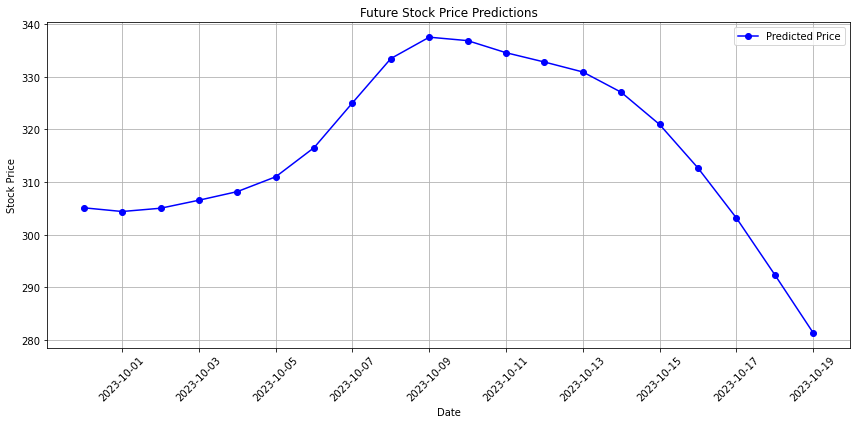

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import joblib

# Define the stock symbol and load historical data
tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')
df_original = df.copy()

# Initialize MinMaxScaler for closing prices
close_scaler = joblib.load(tk + '_close_scaler.joblib')

# Initialize MinMaxScaler for trading volumes
volume_scaler = joblib.load(tk + '_volume_scaler.joblib')

time_step = 100

# Load the pre-trained model
model = load_model(tk + '_stock_prediction_with_volume.keras')

# Set a fixed seed for random number generation
np.random.seed(0)

def make_future_predictions(model, close_scaler, volume_scaler, df, time_step, num_days):
    # Create a copy of the original dataframe
    df_copy = df.copy()

    # Initialize an empty array to store future predictions
    future_predictions = []
    future_dates = []  # To store corresponding dates

    # Loop to make predictions for the specified number of days
    for _ in range(num_days):
        # Prepare the data for the current window
        df_window = df_copy.iloc[-time_step:]
        df_window['Close'] = close_scaler.transform(df_window['Close'].values.reshape(-1, 1))
        df_window['Volume'] = volume_scaler.transform(df_window['Volume'].values.reshape(-1, 1))
        x_window = df_window[['Close', 'Volume']].values.reshape(1, -1, 2)  # 2 features

        # Make a prediction for the next day
        prediction = model.predict(x_window)
        prediction = close_scaler.inverse_transform(prediction)

        # Append the prediction to the future_predictions array
        future_predictions.append(prediction[0][0])

        # Get the date of the next day
        next_day_date = df_copy.index[-1] + pd.DateOffset(1)
        future_dates.append(next_day_date)

        # Update the dataframe for the next iteration
        new_data_point = np.random.uniform(0.9, 1.1) * df_copy.iloc[-1]['Close']
        new_volume = np.random.uniform(0.9, 1.1) * df_copy.iloc[-1]['Volume']
        new_data = pd.DataFrame({'Close': [new_data_point], 'Volume': [new_volume]}, index=[next_day_date])
        df_copy = pd.concat([df_copy, new_data])

    return future_dates, future_predictions

# Specify the number of days into the future for which you want to make predictions
num_days_future = 20  # Change this to the desired number of days

# Make future predictions
future_dates, future_predictions = make_future_predictions(model, close_scaler, volume_scaler, df, time_step, num_days_future)

# Print the future predictions with dates
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Predicted Price: {prediction:.2f}")

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, marker='o', linestyle='-', color='b', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Future Stock Price Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# !!!!!!!!!

In [102]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import joblib

# Define the stock symbol and load historical data
tk = 'ORCL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')
df_original = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Data preparation
df_close = df['Close'].values.reshape(-1, 1)
df_scaled = scaler.fit_transform(df_close)
x_train, y_train = create_dataset(df_scaled, time_step)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Split the dataset into training, validation, and test sets
train_size = int(len(x_train) * 0.70)
val_size = int(len(x_train) * 0.15)
test_size = len(x_train) - train_size - val_size

x_train, x_val, x_test = x_train[0:train_size], x_train[train_size:train_size+val_size], x_train[-test_size:]
y_train, y_val, y_test = y_train[0:train_size], y_train[train_size:train_size+val_size], y_train[-test_size:]

# Train the model on the training set
history = model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1, validation_data=(x_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(x_test)
test_loss = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_loss}")

# Save the trained model and scaler
model.save('stock_prediction_model.h5')  # Save the model
joblib.dump(scaler, 'scaler.joblib')  # Save the MinMaxScaler


Epoch 1/150
4/4 [==============================] - 25s 4s/step - loss: 0.0441 - val_loss: 0.1800
Epoch 2/150
4/4 [==============================] - 16s 4s/step - loss: 0.0264 - val_loss: 0.0081
Epoch 3/150
4/4 [==============================] - 17s 4s/step - loss: 0.0120 - val_loss: 0.0924
Epoch 4/150
4/4 [==============================] - 15s 4s/step - loss: 0.0082 - val_loss: 0.0212
Epoch 5/150
4/4 [==============================] - 18s 5s/step - loss: 0.0079 - val_loss: 0.0663
Epoch 6/150
4/4 [==============================] - 16s 4s/step - loss: 0.0069 - val_loss: 0.0096
Epoch 7/150
4/4 [==============================] - 17s 4s/step - loss: 0.0067 - val_loss: 0.0395
Epoch 8/150
4/4 [==============================] - 18s 4s/step - loss: 0.0055 - val_loss: 0.0083
Epoch 9/150
4/4 [==============================] - 16s 4s/step - loss: 0.0067 - val_loss: 0.0290
Epoch 10/150
4/4 [==============================] - 18s 4s/step - loss: 0.0055 - val_loss: 0.0099
Epoch 11/150
4/4 [===========

C:\Users\Shemeen62\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.joblib']

C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 62ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 69ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 62ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 82ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 62ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 116ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 112ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 52ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 62ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 94ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 85ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 68ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 62ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 59ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 59ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 88ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 89ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 97ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 63ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 74ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 84ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 83ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 82ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 88ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 79ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 94ms/step
Date: 2023-09-30, Predicted Price: 106.28
Date: 2023-10-01, Predicted Price: 105.92
Date: 2023-10-02, Predicted Price: 106.57
Date: 2023-10-03, Predicted Price: 108.22
Date: 2023-10-04, Predicted Price: 110.42
Date: 2023-10-05, Predicted Price: 112.36
Date: 2023-10-06, Predicted Price: 113.80
Date: 2023-10-07, Predicted Price: 114.58
Date: 2023-10-08, Predicted Price: 115.55
Date: 2023-10-09, Predicted Price: 117.99
Date: 2023-10-10, Predicted Price: 121.47
Date: 2023-10-11, Predicted Price: 125.51
Date: 2023-10-12, Predicted Price: 129.34
Date: 2023-10-13, Predicted Price: 132.47
Date: 2023-10-14, Predicted Price: 135.55
Date: 2023-10-15, Predicted Price: 137.68
Date: 2023-10-16, Predicted Price: 137.61
Date: 2023-10-17, Predicted Price: 134.52
Date: 2023-10-18, Predicted Price: 129.86
Date: 2023-10-19, Predicted Price: 126.00
Date: 2023-10-20, Predicted Price: 125.17
Date: 2023-10-21, Predicted Price: 128.63
Date: 2023-10-22, Predic

C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\714774151.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


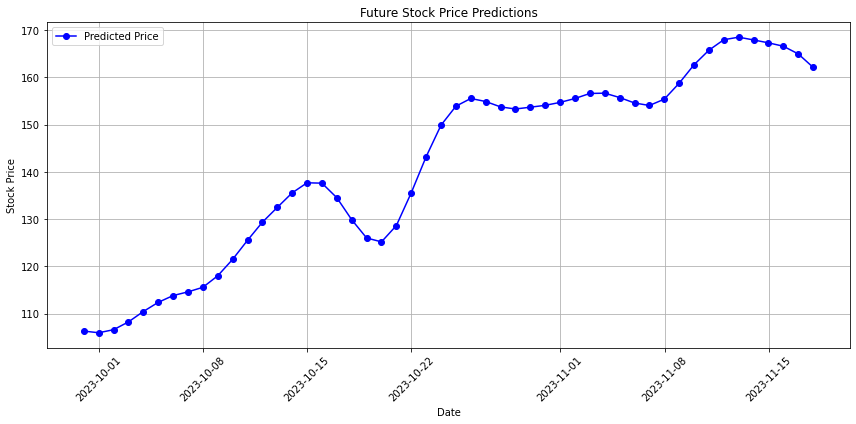

In [107]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import joblib

# Define the stock symbol and load historical data
tk = 'ORCL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')
df_original = df.copy()

# Load the pre-trained model and scaler
model = load_model('stock_prediction_model.h5')  # Load the model
scaler = joblib.load('scaler.joblib')  # Load the MinMaxScaler

# Set a fixed seed for random number generation
np.random.seed(0)

def make_future_predictions(model, scaler, df, time_step, num_days):
    # Create a copy of the original dataframe
    df_copy = df.copy()

    # Initialize an empty array to store future predictions
    future_predictions = []
    future_dates = []  # To store corresponding dates

    # Loop to make predictions for the specified number of days
    for _ in range(num_days):
        # Prepare the data for the current window
        df_window = df_copy.iloc[-time_step:]
        df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
        x_window = df_window['Close'].values.reshape(1, -1, 1)  # 1 feature

        # Make a prediction for the next day
        prediction = model.predict(x_window)
        prediction = scaler.inverse_transform(prediction)

        # Append the prediction to the future_predictions array
        future_predictions.append(prediction[0][0])

        # Get the date of the next day
        next_day_date = df_copy.index[-1] + pd.DateOffset(1)
        future_dates.append(next_day_date)

        # Update the dataframe for the next iteration
        new_data_point = np.random.uniform(0.9, 1.1) * df_copy.iloc[-1]['Close']
        new_data = pd.DataFrame({'Close': [new_data_point]}, index=[next_day_date])
        df_copy = pd.concat([df_copy, new_data])

    return future_dates, future_predictions

# Specify the number of days into the future for which you want to make predictions
num_days_future = 50  # Change this to the desired number of days

# Make future predictions
future_dates, future_predictions = make_future_predictions(model, scaler, df, time_step, num_days_future)

# Print the future predictions with dates
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Predicted Price: {prediction:.2f}")

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, marker='o', linestyle='-', color='b', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Future Stock Price Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MSFT

Epoch 1/150
4/4 [==============================] - 30s 4s/step - loss: 0.1588 - val_loss: 0.4294
Epoch 2/150
4/4 [==============================] - 17s 4s/step - loss: 0.0729 - val_loss: 0.2292
Epoch 3/150
4/4 [==============================] - 17s 4s/step - loss: 0.0268 - val_loss: 0.0323
Epoch 4/150
4/4 [==============================] - 17s 4s/step - loss: 0.0183 - val_loss: 0.1546
Epoch 5/150
4/4 [==============================] - 17s 4s/step - loss: 0.0196 - val_loss: 0.0421
Epoch 6/150
4/4 [==============================] - 18s 4s/step - loss: 0.0159 - val_loss: 0.0376
Epoch 7/150
4/4 [==============================] - 17s 4s/step - loss: 0.0133 - val_loss: 0.0675
Epoch 8/150
4/4 [==============================] - 17s 4s/step - loss: 0.0127 - val_loss: 0.0131
Epoch 9/150
4/4 [==============================] - 17s 4s/step - loss: 0.0110 - val_loss: 0.0130
Epoch 10/150
4/4 [==============================] - 18s 5s/step - loss: 0.0107 - val_loss: 0.0062
Epoch 11/150
4/4 [===========

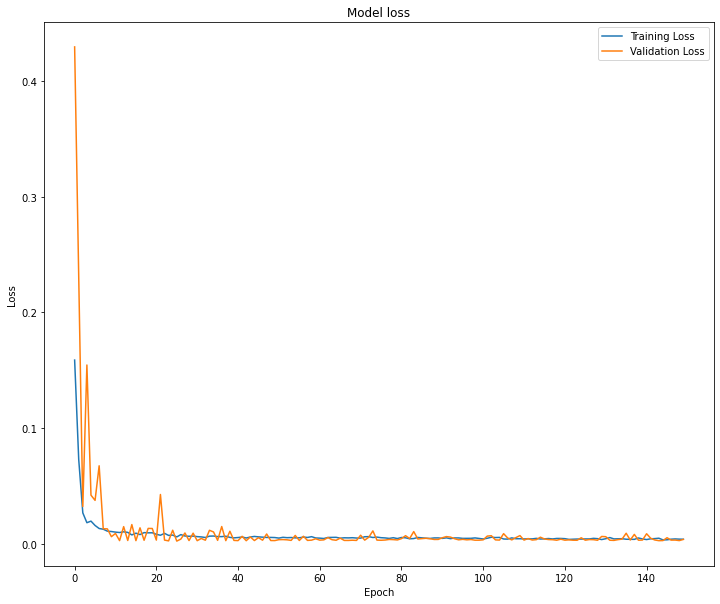

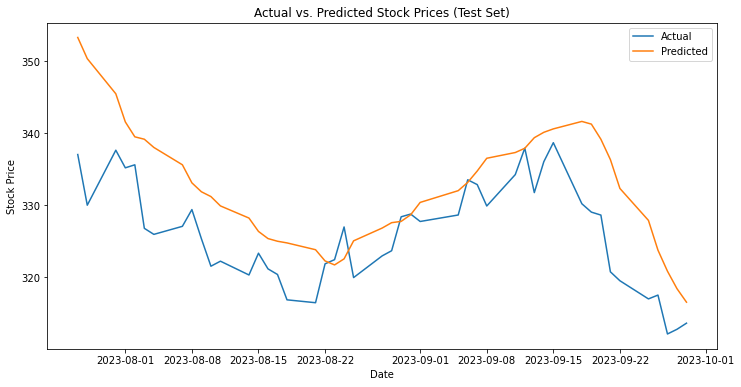

C:\Users\Shemeen62\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.joblib']

In [108]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import joblib

# Define the stock symbol and load historical data
tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')
df_original = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Data preparation
df_close = df['Close'].values.reshape(-1, 1)
df_scaled = scaler.fit_transform(df_close)
x_train, y_train = create_dataset(df_scaled, time_step)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Split the dataset into training, validation, and test sets
train_size = int(len(x_train) * 0.70)
val_size = int(len(x_train) * 0.15)
test_size = len(x_train) - train_size - val_size

x_train, x_val, x_test = x_train[0:train_size], x_train[train_size:train_size+val_size], x_train[-test_size:]
y_train, y_val, y_test = y_train[0:train_size], y_train[train_size:train_size+val_size], y_train[-test_size:]

# Train the model on the training set
history = model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1, validation_data=(x_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(x_test)
test_loss = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(test_loss)
print(f"Test Mean Squared Error (MSE): {test_loss}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test}")

# Plot training & validation loss values
plt.figure(figsize=(12, 10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot actual vs. predicted stock prices for the test set
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(df_original.index[-len(y_test_inverse):], y_test_inverse, label='Actual')
plt.plot(df_original.index[-len(y_pred_inverse):], y_pred_inverse, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices (Test Set)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Save the trained model into the "models" directory
model.save('stock_prediction_model.h5')
joblib.dump(scaler, 'scaler.joblib')  # Save the MinMaxScaler in the "models" directory

C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\4187477520.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 62ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\4187477520.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\4187477520.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 64ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\4187477520.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\4187477520.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 67ms/step


C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\4187477520.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
C:\Users\Shemeen62\AppData\Local\Temp\ipykernel_12704\4187477520.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))


1/1 [==============================] - 0s 81ms/step
Date: 2023-09-30, Predicted Price: 315.77
Date: 2023-10-01, Predicted Price: 317.41
Date: 2023-10-02, Predicted Price: 322.36
Date: 2023-10-03, Predicted Price: 330.74
Date: 2023-10-04, Predicted Price: 340.40
Date: 2023-10-05, Predicted Price: 347.12
Date: 2023-10-06, Predicted Price: 351.61


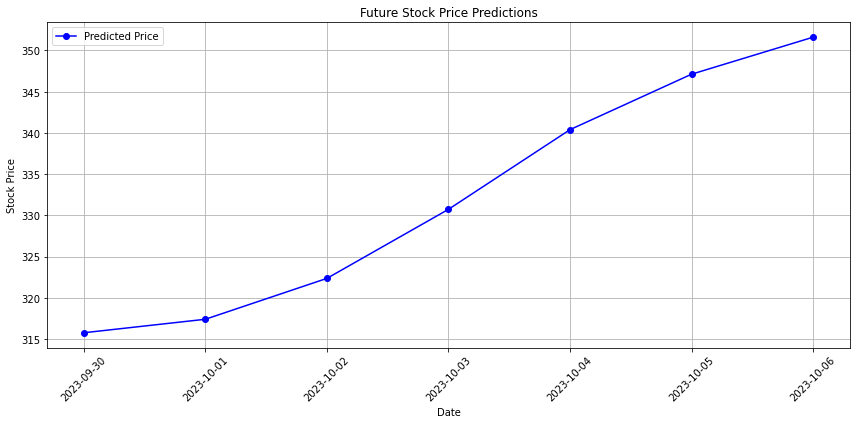

In [128]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import joblib

# Define the stock symbol and load historical data
tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-03-01')
df_original = df.copy()

# Load the pre-trained model and scaler
model = load_model('stock_prediction_model.h5')  # Load the model
scaler = joblib.load('scaler.joblib')  # Load the MinMaxScaler

# Set a fixed seed for random number generation
np.random.seed(0)

def make_future_predictions(model, scaler, df, time_step, num_days):
    # Create a copy of the original dataframe
    df_copy = df.copy()

    # Initialize an empty array to store future predictions
    future_predictions = []
    future_dates = []  # To store corresponding dates

    # Loop to make predictions for the specified number of days
    for _ in range(num_days):
        # Prepare the data for the current window
        df_window = df_copy.iloc[-time_step:]
        df_window['Close'] = scaler.transform(df_window['Close'].values.reshape(-1, 1))
        x_window = df_window['Close'].values.reshape(1, -1, 1)  # 1 feature

        # Make a prediction for the next day
        prediction = model.predict(x_window)
        prediction = scaler.inverse_transform(prediction)

        # Append the prediction to the future_predictions array
        future_predictions.append(prediction[0][0])

        # Get the date of the next day
        next_day_date = df_copy.index[-1] + pd.DateOffset(1)
        future_dates.append(next_day_date)

        # Update the dataframe for the next iteration
        new_data_point = np.random.uniform(0.9, 1.1) * df_copy.iloc[-1]['Close']
        new_data = pd.DataFrame({'Close': [new_data_point]}, index=[next_day_date])
        df_copy = pd.concat([df_copy, new_data])

    return future_dates, future_predictions

# Specify the number of days into the future for which you want to make predictions
num_days_future = 7  # Change this to the desired number of days

# Make future predictions
future_dates, future_predictions = make_future_predictions(model, scaler, df, time_step, num_days_future)

# Print the future predictions with dates
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Predicted Price: {prediction:.2f}")

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, marker='o', linestyle='-', color='b', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Future Stock Price Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()